# Preguntas del catálogo #2 - PAID

## Ignacio Grané Rojas - 2019380056
## Avance de tareas cortas
## Bloque 2

### Instalaciones previas

In [1]:
!pip install matplotlib
!pip install opencv-python
!pip install numpy

### Imports necesarios

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Pregunta #1

In [3]:
function Z = con_mat(A, B)
  [mA, nA] = size(A);
  [mB, nB] = size(B);
  mZ = mA + mB - 1;
  nZ = nA + nB - 1;
  Z = zeros(mZ, nZ);  % Inicializa la matriz de salida
  
  % Rellenar la matriz Z con las sumas de productos de submatrices
  for i = 1:mA
    for j = 1:nA
      for k = 1:mB
        for l = 1:nB
          Z(i+k-1, j+l-1) += A(i, j) * B(k, l);
        end
      end
    end
  end
end

A = [1 0 1; 4 3 1; -1 0 2];
B = [-1 1 2 3; -4 0 1 5];
Z = con_mat(A, B)


Z =2004h

   -1    1    1    4    2    3
   -8    1    7   24   12    8
  -15  -13   -4   22   20   11
    4    0   -9   -5    2   10



## Pregunta #2

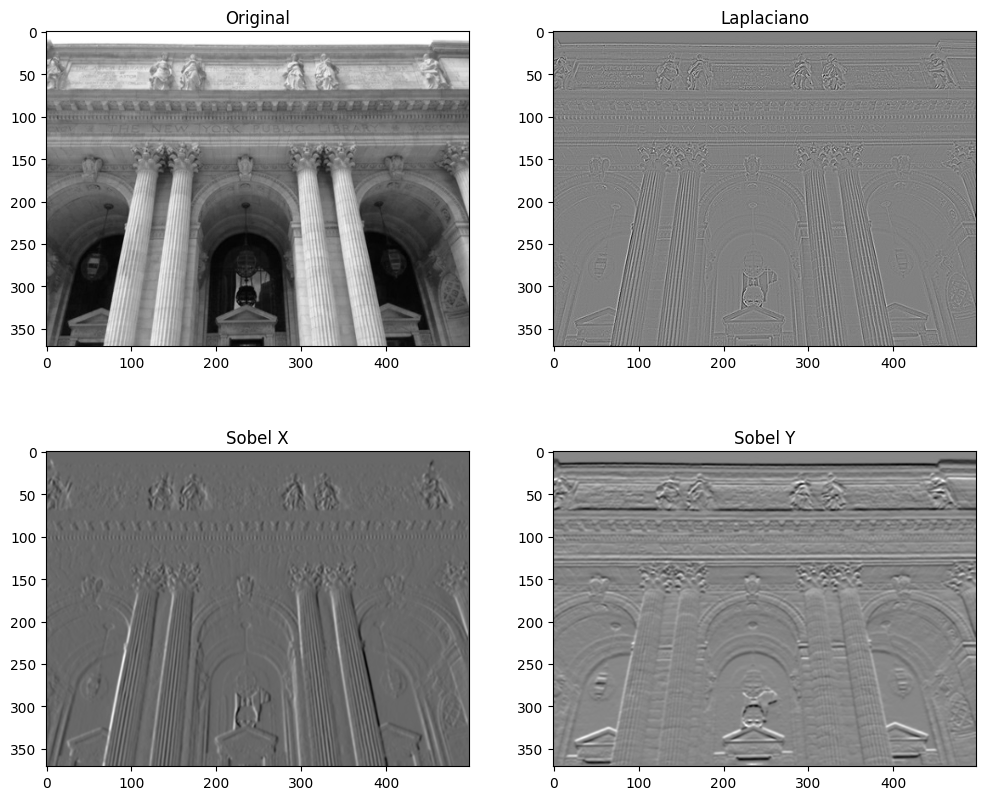

In [4]:
# Cargar la ruta de imagen
image_path = 'columnas.jpg' 

# Cargar la imagen en escala de grises
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Aplicar el filtro Laplaciano
laplacian = cv2.Laplacian(image, cv2.CV_64F)

# Aplicar el operador de Sobel en X e Y
sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)

# Visualizar la imagen original y los resultados de los filtros
plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1), plt.imshow(image, cmap='gray'), plt.title('Original')
plt.subplot(2, 2, 2), plt.imshow(laplacian, cmap='gray'), plt.title('Laplaciano')
plt.subplot(2, 2, 3), plt.imshow(sobelx, cmap='gray'), plt.title('Sobel X')
plt.subplot(2, 2, 4), plt.imshow(sobely, cmap='gray'), plt.title('Sobel Y')
plt.show()

## Pregunta #3

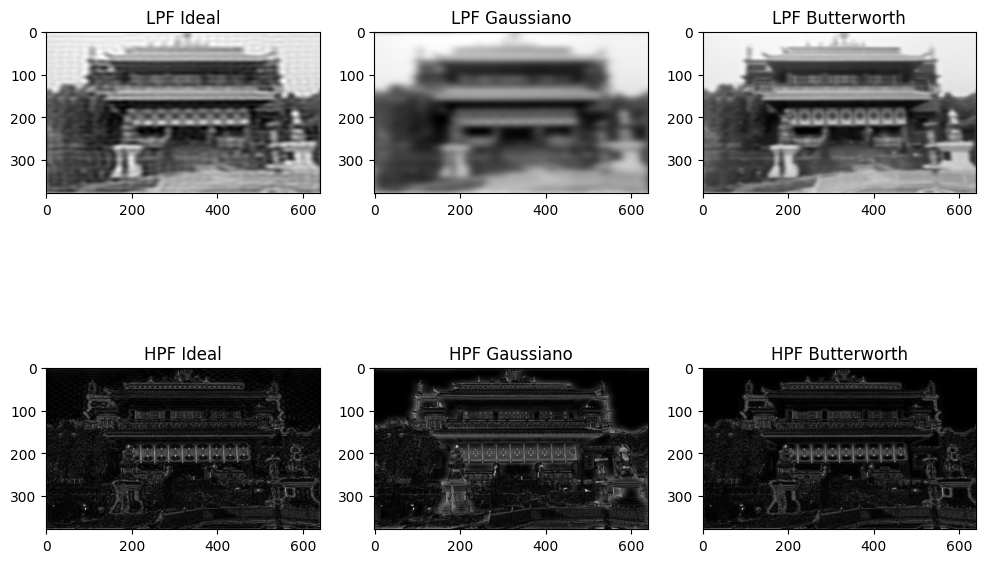

In [5]:
def apply_filter(img, filter):
    dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)
    filtered = dft_shift * filter[:, :, np.newaxis]
    f_ishift = np.fft.ifftshift(filtered)
    img_back = cv2.idft(f_ishift)
    img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])
    return img_back

def create_ideal_lpf(shape, D0):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    mask = np.zeros((rows, cols), np.uint8)
    center = (crow, ccol)
    for x in range(cols):
        for y in range(rows):
            if np.sqrt((x - ccol)**2 + (y - crow)**2) <= D0:
                mask[y, x] = 1
    return mask

def create_gaussian_lpf(shape, sigma):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    x, y = np.ogrid[:rows, :cols]
    mask = np.exp(-((x - crow)**2 + (y - ccol)**2) / (2 * sigma**2))
    return mask

def create_butterworth_lpf(shape, D0, n):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    x, y = np.ogrid[:rows, :cols]
    d = np.sqrt((x - crow)**2 + (y - ccol)**2)
    mask = 1 / (1 + (d / D0)**(2 * n))
    return mask

def create_hpf_from_lpf(lpf):
    return 1 - lpf

# Cargar imagen
image_path = 'edificio.jpg'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Parámetros
D0 = 30  
sigma = 10 
n = 2  

# Crear filtros
lpf_ideal = create_ideal_lpf(img.shape, D0)
lpf_gaussian = create_gaussian_lpf(img.shape, sigma)
lpf_butterworth = create_butterworth_lpf(img.shape, D0, n)

hpf_ideal = create_hpf_from_lpf(lpf_ideal)
hpf_gaussian = create_hpf_from_lpf(lpf_gaussian)
hpf_butterworth = create_hpf_from_lpf(lpf_butterworth)

# Aplicar filtros
img_lpf_ideal = apply_filter(img, lpf_ideal)
img_lpf_gaussian = apply_filter(img, lpf_gaussian)
img_lpf_butterworth = apply_filter(img, lpf_butterworth)

img_hpf_ideal = apply_filter(img, hpf_ideal)
img_hpf_gaussian = apply_filter(img, hpf_gaussian)
img_hpf_butterworth = apply_filter(img, hpf_butterworth)

# Mostrar resultados
plt.figure(figsize=(12, 8))
plt.subplot(2, 3, 1), plt.imshow(img_lpf_ideal, cmap='gray'), plt.title('LPF Ideal')
plt.subplot(2, 3, 2), plt.imshow(img_lpf_gaussian, cmap='gray'), plt.title('LPF Gaussiano')
plt.subplot(2, 3, 3), plt.imshow(img_lpf_butterworth, cmap='gray'), plt.title('LPF Butterworth')
plt.subplot(2, 3, 4), plt.imshow(img_hpf_ideal, cmap='gray'), plt.title('HPF Ideal')
plt.subplot(2, 3, 5), plt.imshow(img_hpf_gaussian, cmap='gray'), plt.title('HPF Gaussiano')
plt.subplot(2, 3, 6), plt.imshow(img_hpf_butterworth, cmap='gray'), plt.title('HPF Butterworth')
plt.show()


## Pregunta #4

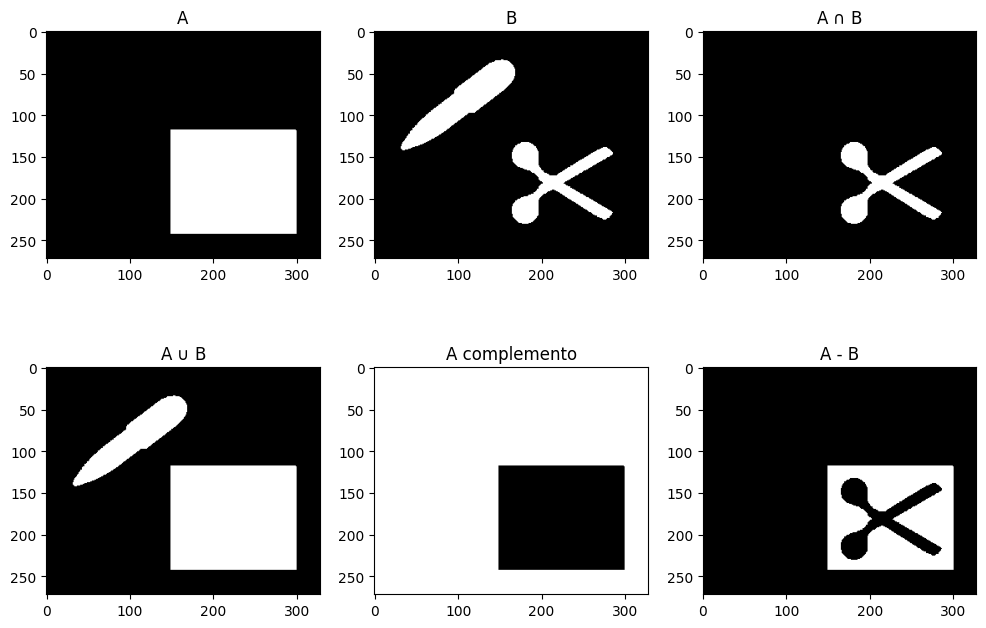

In [6]:
def binaria(image, threshold=0.5):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # Convertir imagen a escala de grises
    _, binary_image = cv2.threshold(gray_image, threshold * 255, 255, cv2.THRESH_BINARY) # Umbralizar para convertirla en binaria
    return binary_image

# Cargar las imágenes
A = cv2.imread('imagen2.jpg')
B = cv2.imread('imagen3.jpg')

# Convertir las imágenes a formato binario
A = binaria(A)
B = binaria(B)

# Crear una figura para mostrar los resultados
plt.figure(figsize=(12, 8))

# Mostrar A
plt.subplot(2, 3, 1)
plt.imshow(A, cmap='gray')
plt.title('A')

# Mostrar B
plt.subplot(2, 3, 2)
plt.imshow(B, cmap='gray')
plt.title('B')

# Intersección de A y B
O1 = A & B
plt.subplot(2, 3, 3)
plt.imshow(O1, cmap='gray')
plt.title(r'A $\cap$ B') 

# Unión de A y B
O2 = A | B
plt.subplot(2, 3, 4)
plt.imshow(O2, cmap='gray')
plt.title(r'A $\cup$ B')

# Complemento de A
O3 = ~A
plt.subplot(2, 3, 5)
plt.imshow(O3, cmap='gray')
plt.title('A complemento')

# Diferencia de A y B
O4 = A & ~B
plt.subplot(2, 3, 6)
plt.imshow(O4, cmap='gray')
plt.title(r'A - B')

# Mostrar todas las subfiguras
plt.show()